In [ ]:
import pandas as pd

In [ ]:
churn = pd.read_csv('Bank_Churn.csv')

In [ ]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
import seaborn as sns

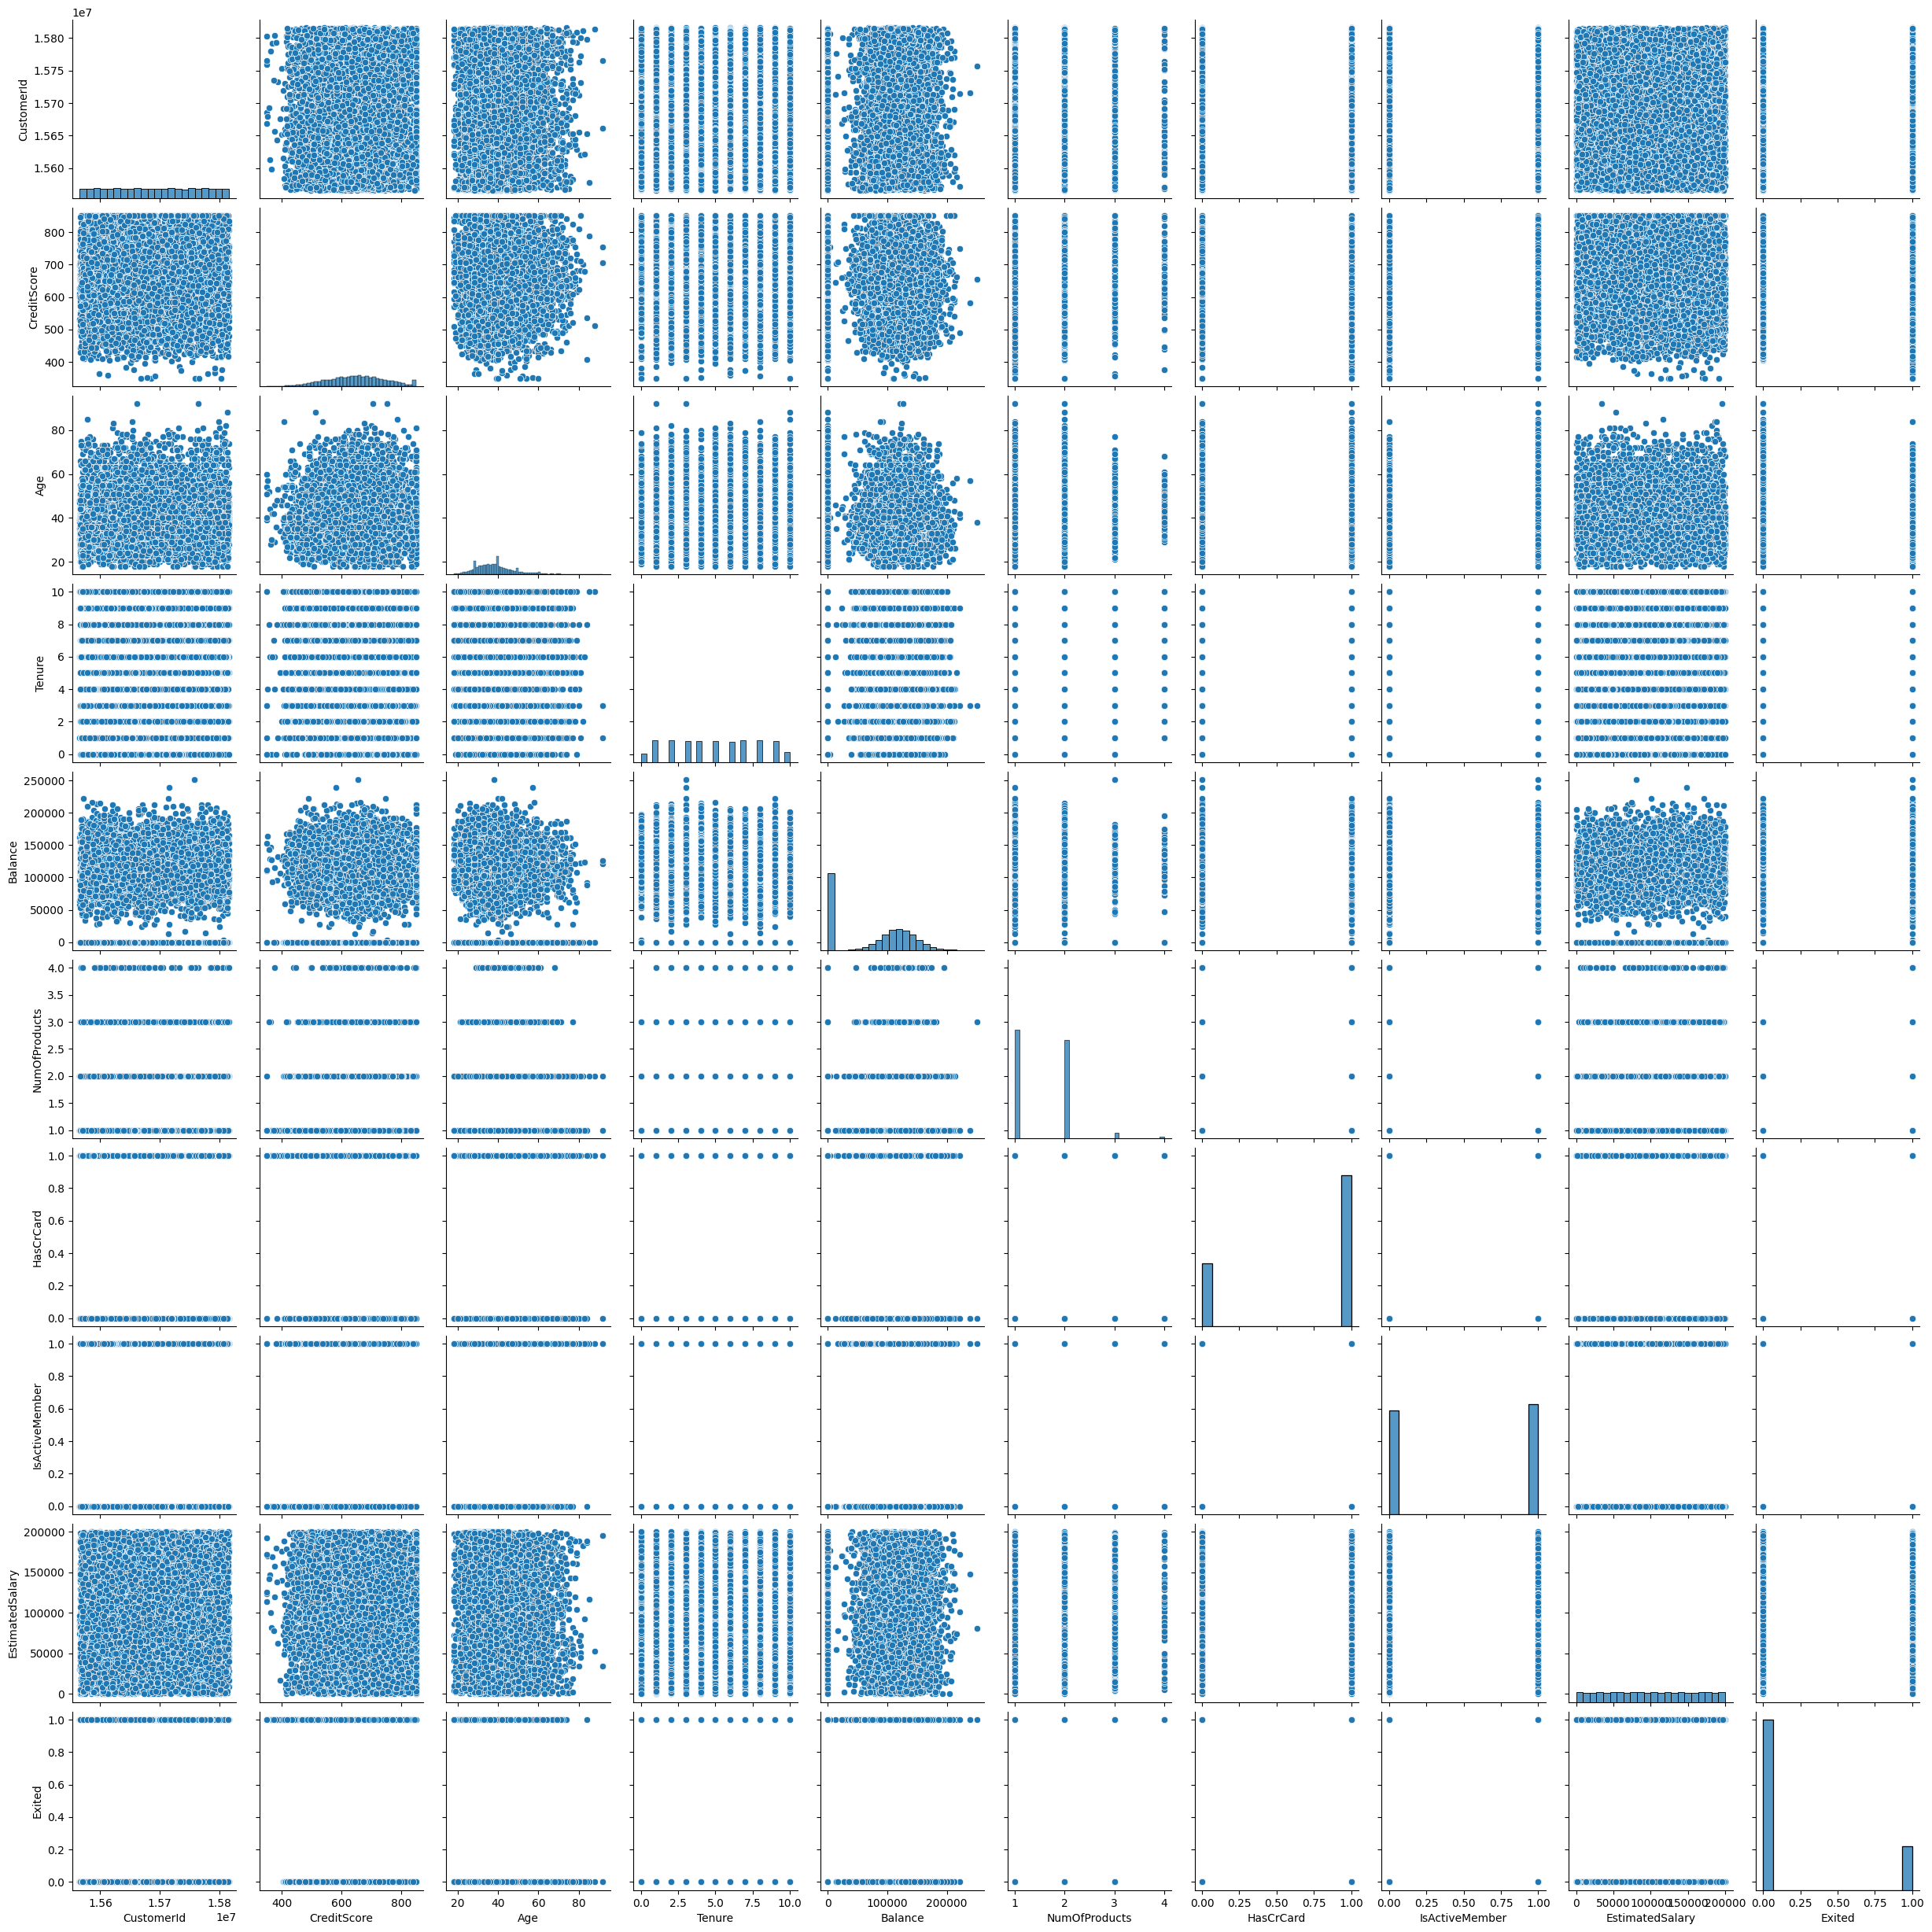

In [ ]:
sns.pairplot(churn)

<Axes: >

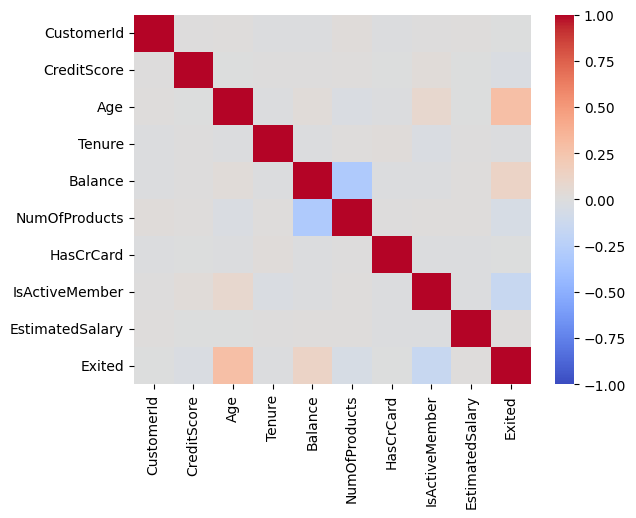

In [ ]:
sns.heatmap(churn.corr(numeric_only = True), vmin = -1, vmax = 1, cmap = "coolwarm")

In [ ]:
import matplotlib.pyplot as plt

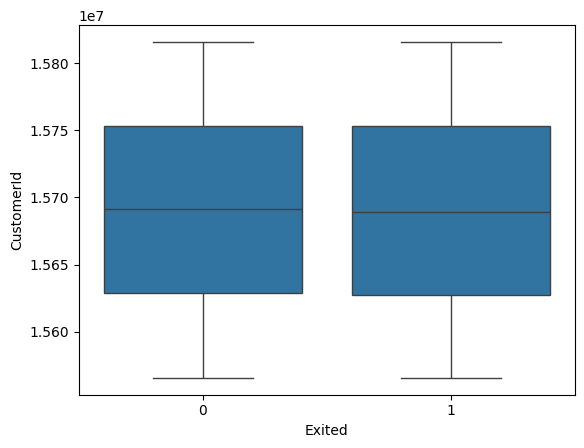

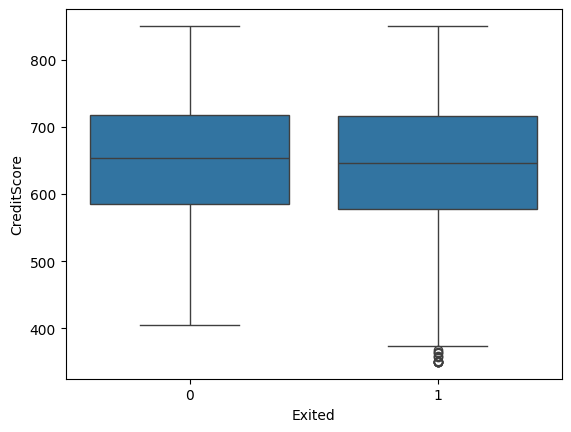

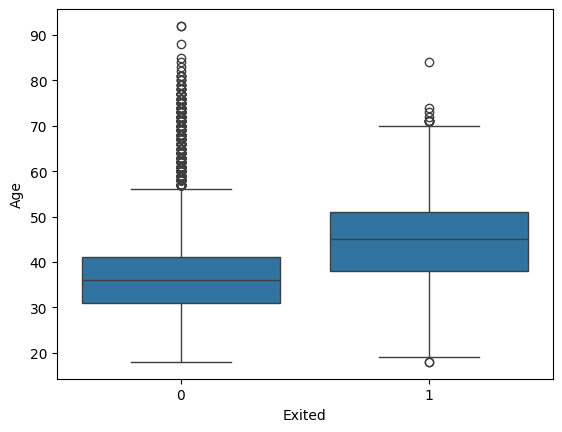

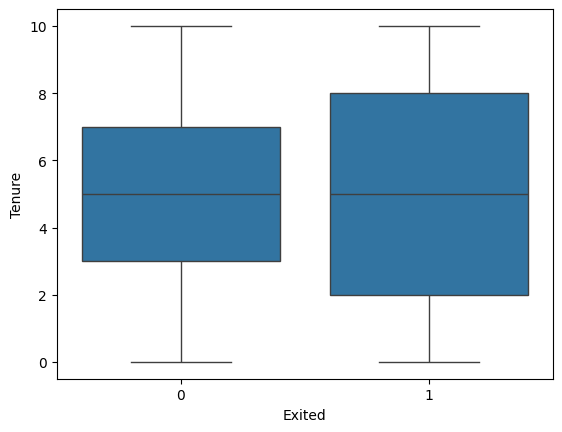

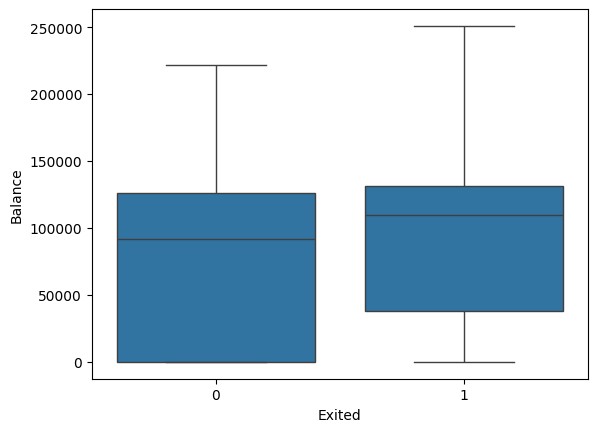

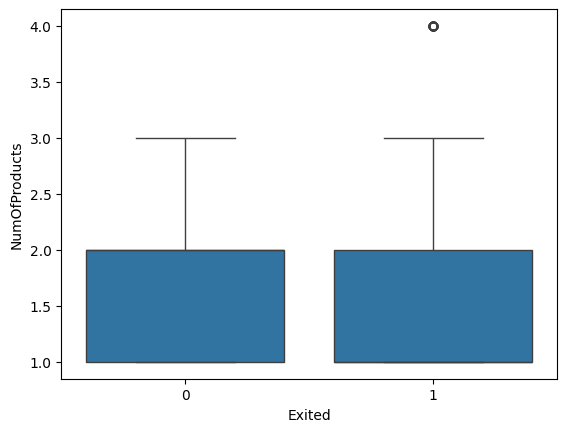

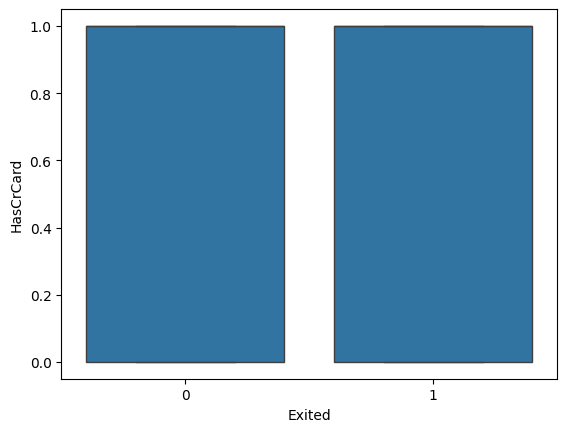

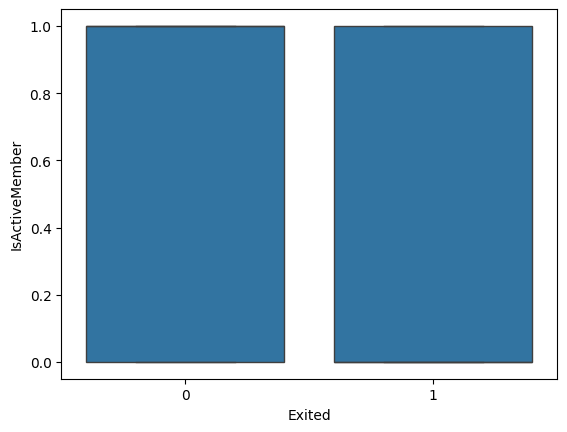

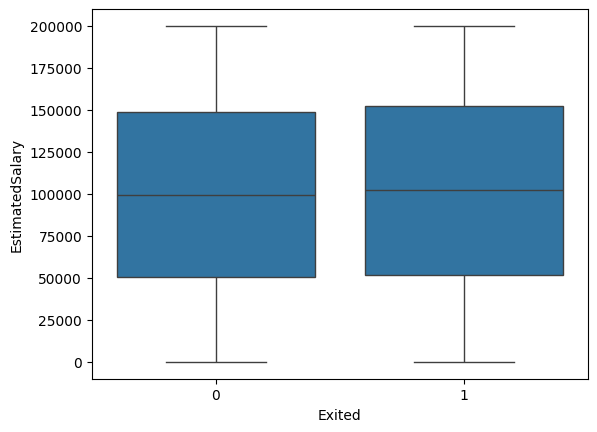

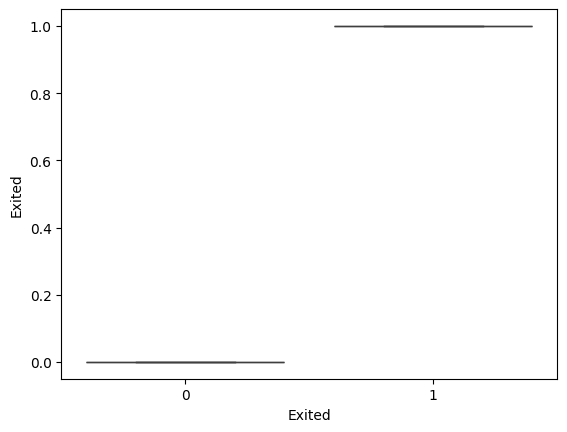

In [ ]:
for col in churn.select_dtypes("number"):
  sns.boxplot(data = churn, x = "Exited", y = col)
  plt.show()

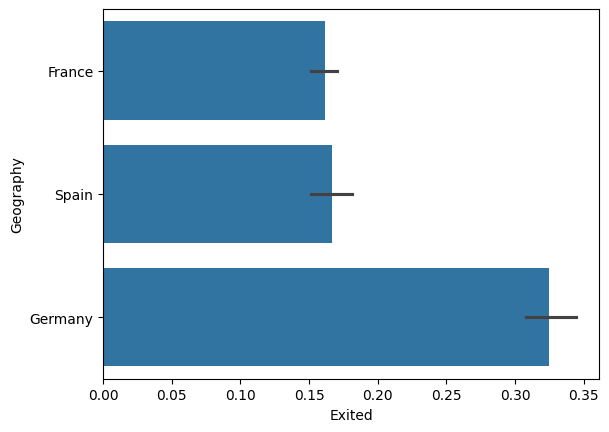

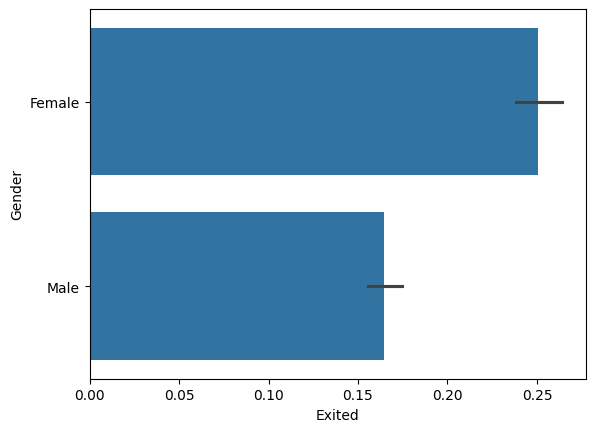

In [ ]:
for col in churn.select_dtypes("object").columns[1:]:
  sns.barplot(data = churn, x = "Exited", y = col)
  plt.show()

In [ ]:
#Preparing the data for modeling - Exploratory Data Analysis
churn_modelling_df = churn.drop(["CustomerId", "Surname"], axis = 1)
churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Feature Engineering (creating new columns)
churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df["Balance"] / churn_modelling_df["EstimatedSalary"],
    income_v_product = churn_modelling_df["EstimatedSalary"] / churn_modelling_df["NumOfProducts"]
)
churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


In [ ]:
churn_modelling_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703,74715.158001
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260,52058.899406
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,32589.780000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002,65908.002500
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022,100943.797500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440,199970.740000


<Axes: xlabel='Exited', ylabel='balance_to_income'>

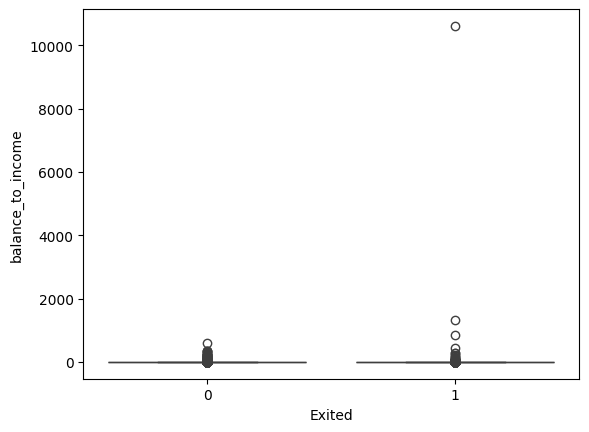

In [ ]:
sns.boxplot(churn_modelling_df, x = "Exited", y = "balance_to_income")

<Axes: xlabel='Exited', ylabel='balance_to_income'>

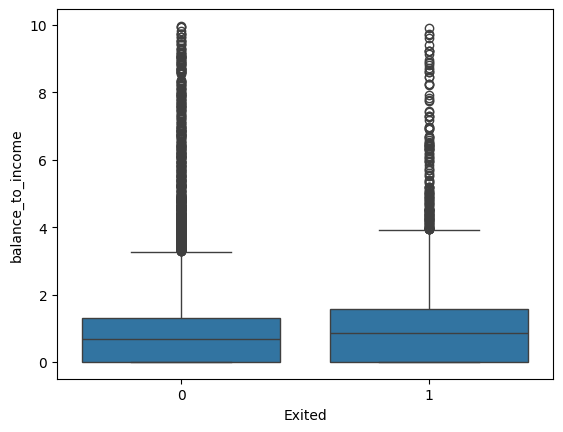

In [ ]:
sns.boxplot(churn_modelling_df.query("balance_to_income < 10"), x = "Exited", y = "balance_to_income")

<Axes: xlabel='Exited', ylabel='income_v_product'>

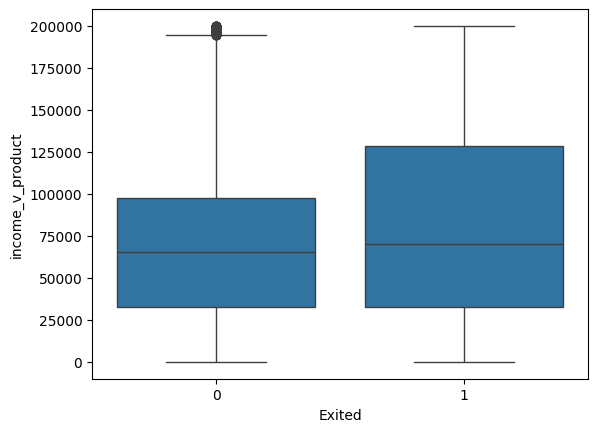

In [ ]:
sns.boxplot(churn_modelling_df, x = "Exited", y = "income_v_product")

In [ ]:
churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first = True, dtype = "int")
churn_modelling_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into test and train
x = churn_modelling_df.drop("Exited", axis = 1)
y = churn_modelling_df["Exited"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2404)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8168 to 9132
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   balance_to_income  8000 non-null   float64
 9   income_v_product   8000 non-null   float64
 10  Geography_Germany  8000 non-null   int64  
 11  Geography_Spain    8000 non-null   int64  
 12  Gender_Male        8000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 875.0 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1618 to 8876
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   balance_to_income  2000 non-null   float64
 9   income_v_product   2000 non-null   float64
 10  Geography_Germany  2000 non-null   int64  
 11  Geography_Spain    2000 non-null   int64  
 12  Gender_Male        2000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 218.8 KB


In [ ]:
x_train2 = x_train.drop(["Balance", "EstimatedSalary", "income_v_product"], axis = 1)

In [ ]:
#Build & Evaluate - Logistics Refression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "newton-cholesky")

lr = logreg.fit(x_train, y_train)

print(f"Train Accuracy: {lr.score(x_train, y_train)}")

Train Accuracy: 0.81475


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train, lr.predict(x_train))

array([[6108,  249],
       [1233,  410]])

In [ ]:
recall_score(y_train, lr.predict(x_train))

0.24954351795496044

In [ ]:
list(zip(x_train, lr.coef_[0]))

[('CreditScore', -0.0006807762413326221),
 ('Age', 0.07294656394634312),
 ('Tenure', -0.02332336440194485),
 ('Balance', 2.2012249688525752e-06),
 ('NumOfProducts', 0.6917267560571969),
 ('HasCrCard', -0.05894691525684386),
 ('IsActiveMember', -1.04028753507645),
 ('EstimatedSalary', -1.5271612276031545e-05),
 ('balance_to_income', 0.0029920455861426475),
 ('income_v_product', 2.060418515521903e-05),
 ('Geography_Germany', 0.7294780476634376),
 ('Geography_Spain', 0.04696709345898719),
 ('Gender_Male', -0.5543139511771789)]

In [ ]:
confusion_matrix(y_test, lr.predict(x_test))

array([[1543,   63],
       [ 295,   99]])

In [ ]:
print(f"Train Accuracy: {lr.score(x_test, y_test)}")

Train Accuracy: 0.821


In [ ]:
precision_score(y_test, lr.predict(x_test))

0.6111111111111112

In [ ]:
recall_score(y_test, lr.predict(x_test))

0.2512690355329949

In [ ]:
f1_score(y_test, lr.predict(x_test))

0.35611510791366907

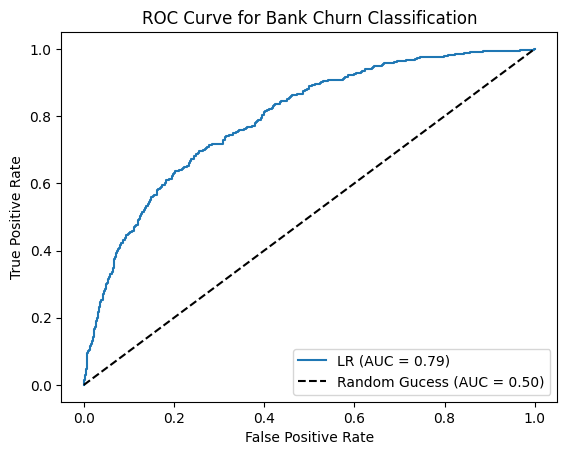

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

#Plot ROC Curve
plt.plot(fpr1, tpr1, label = f'LR (AUC = {auc_score:.2f})')

#Draw Random Gucess
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Gucess (AUC = 0.50)')

#Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bank Churn Classification')
plt.legend()
plt.show()

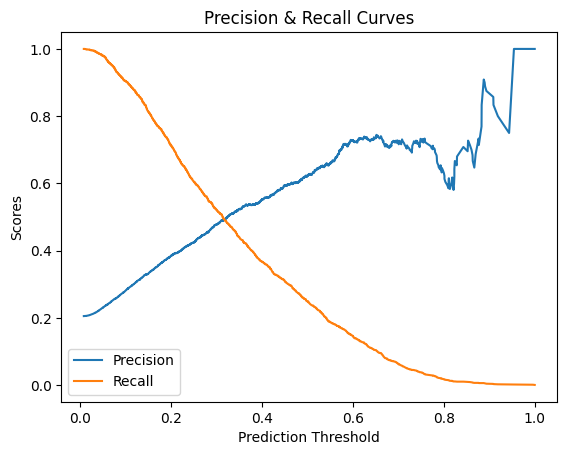

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(x_train)[:, 1])
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [ ]:
import numpy as np

np.where(p_curve > .5)

(array([6419, 6420, 6421, ..., 7998, 7999, 8000]),)

In [ ]:
t_curve[6377]

0.3200893632561699

In [ ]:
confusion_matrix(y_test, lr.predict_proba(x_test)[:, 1] > .34)

array([[1428,  178],
       [ 213,  181]])

In [ ]:
recall_score(y_test, lr.predict_proba(x_test)[:, 1] > .34)

0.4593908629441624

In [ ]:
precision_score(y_test, lr.predict_proba(x_test)[:, 1] > .34)

0.5041782729805014

In [ ]:
#Fit and Tune - Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(x_train, y_train)

print(f"Train Accuracy: {rf.score(x_train, y_train)}")
print(f"Test Accuracy: {rf.score(x_test, y_test)}")

Train Accuracy: 1.0
Test Accuracy: 0.8715


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier(random_state = 2023, n_jobs = -1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100]
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter = 100,
    scoring = "accuracy"
)

grid.fit(x_train, y_train)

grid.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'n_estimators': 400,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': None,
 'max_depth': 9,
 'bootstrap': True}

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    'n_estimators': np.arange(start=850, stop=951, step=10),
    'max_samples': [.4, .5, .6],
    'max_depth': [8, 10, 12],
    'min_samples_leaf':[5, 10, 15]
}

grid = GridSearchCV(
    rf,
    params,
    scoring="accuracy"
)

grid.fit(x_train, y_train)

grid.best_params_

{'max_depth': 10,
 'max_samples': 0.5,
 'min_samples_leaf': 5,
 'n_estimators': 880}

In [43]:
rf = RandomForestClassifier(**{'n_estimators':890,
                               'min_samples_leaf': 5,
                               'max_samples': 0.5,
                               'max_depth': 12,
                               'bootstrap': True})

rf = rf.fit(x_train, y_train)

print(f"Train Accuracy: {rf.score(x_train, y_train)}")
print(f"Train Accuracy: {rf.score(x_test, y_test)}")

Train Accuracy: 0.885625
Train Accuracy: 0.874


In [44]:
from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

auc_score

0.8754685791227061

<Axes: xlabel='importance', ylabel='feature'>

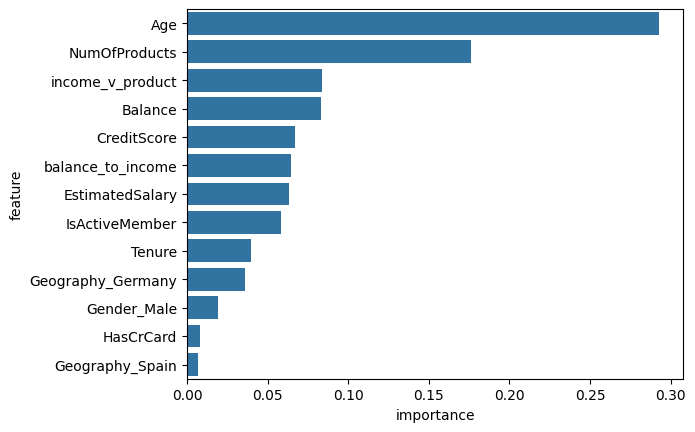

In [45]:
importance = pd.DataFrame(
    {"feature": x_train.columns,
     "importance": rf.feature_importances_}
).sort_values("importance", ascending=False).iloc[:20]

sns.barplot(importance, x="importance", y="feature")